In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [0]:
path = Config.data_path()/'toxic'

In [0]:
! kaggle competitions download -c jigsaw-toxic-comment-classification-challenge -p {path}

^C


In [0]:
df_test = pd.read_csv(path/'test.csv')
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [0]:
df_test.loc[0][1]

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

In [0]:
df_train = pd.read_csv(path/'train.csv')
df_train.head(7)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0


In [0]:
df_test_labels = pd.read_csv(path/'test_labels.csv')
df_test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [0]:
df_sample = pd.read_csv(path/'sample_submission.csv')
df_sample.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [0]:
??TextList.label_from_df

In [0]:
bs=16

In [0]:
df_language_model =pd.DataFrame(df_test['comment_text'].append(df_train['comment_text'],ignore_index=True))

In [0]:
len(df_language_model)==len(df_test)+len(df_train)

True

In [0]:
df_language_model.head()

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.


In [0]:
TextList.from_df??

In [0]:
df_language_model['label']=0

In [0]:
df_language_model.iloc[:]

,comment_text,label
0,Yo bitch Ja Rule is more succesful then you'll...,0
1,== From RfC == \n\n The title is fine as it is...,0
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0
3,":If you have a look back at the source, the in...",0
4,I don't anonymously edit articles at all.,0
5,Thank you for understanding. I think very high...,0
6,Please do not add nonsense to Wikipedia. Such ...,0
7,:Dear god this site is horrible.,0
8,""" \n Only a fool can believe in such numbers. ...",0
9,== Double Redirects == \n\n When fixing double...,0


In [0]:
data_lm = (TextList.from_df(df_language_model)
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))

In [0]:
data_lm.show_batch()

idx,text
0,"bein like tupac he was a brother too ... fuckin white boys get things right next time . , xxbos = = xxmaj from rfc = = \n \n xxmaj the title is fine as it is , xxup imo . xxbos "" \n \n = = xxmaj sources = = \n \n * xxmaj xxunk xxmaj ashton on xxmaj lapland — / "" xxbos : xxmaj"
1,xxmaj its not unsourced ya jerk far as i can see i 'm the only one who knows him xxbos = = ? ? = = \n \n xxmaj when didi he die ? xxmaj where was he educated ? xxmaj did he have brothers and sisters ? xxbos xxmaj the quotation and edits referenced does not appear in the article at all . xxbos = = xxmaj article
2,". i ask for your patience in the short run , so that i hopefully can make a difference for everyone in the long run . \n \n xxmaj by the way , i was very happy to see that you took the time to thank for her recent changes , i sincerely believe that communication between you and her is the key to defuse the current situation ."
3,"how to conduct such research . i 'm taking a wikivacation now , not because of stress , but because i have other things to do . i would appreciate if you stopped fighting what appears to be a fairly clear consensus against random footnote sprinkling . \n : xxbos xxrep 5 : xxmaj seriously ? xxmaj you have one of , if not xxup the xxunk and worst"
4,"xxbos : : xxmaj yes i agree . xxbos = = xxmaj xxunk \n xxmaj hey , i see that you 're from xxmaj planet xxmaj earth . i 'm also from xxmaj planet xxmaj earth ! i have been working on the xxmaj wikipedia article about xxmaj planet xxmaj earth from xxmaj planet xxmaj earth . xxmaj would you like to give me a hand ? xxbos xxmaj"


In [0]:
data_lm.save('data_lm.pkl')

In [0]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


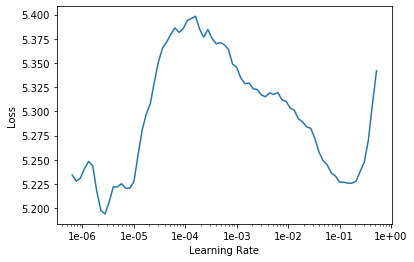

In [0]:
learn_lm.recorder.plot(skip_end=15)

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


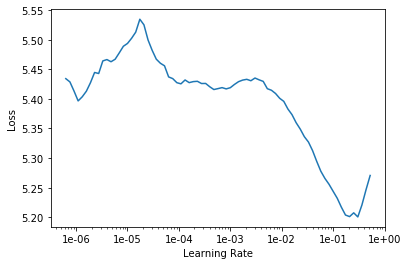

In [0]:
learn_lm.recorder.plot(skip_end=15)

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


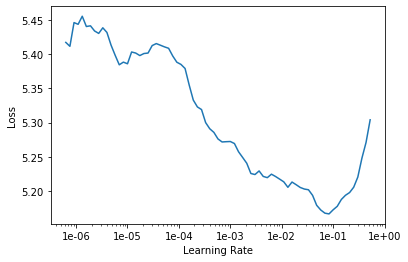

In [0]:
learn_lm.recorder.plot(skip_end=15)

In [0]:
learn_lm.fit_one_cycle(1, 5e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.062661,4.703176,0.259544,1:34:35


In [0]:
learn_lm.save('language-1')

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


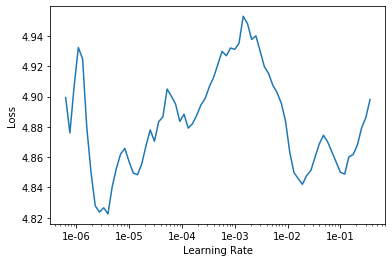

In [0]:
learn_lm.recorder.plot(skip_end=15)

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


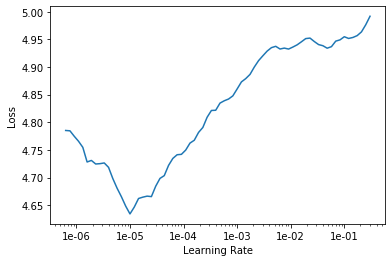

In [0]:
learn_lm.recorder.plot(skip_end=15)

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


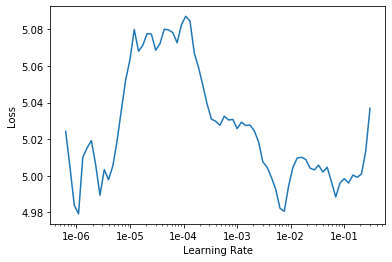

In [0]:
learn_lm.recorder.plot(skip_end=15)

In [0]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn_lm.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.354794,4.102431,0.319107,1:22:02


In [0]:
learn_lm.save('language-new-1')

In [0]:
learn_lm.fit_one_cycle(1, 7e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.294847,4.090381,0.320687,1:21:23


In [0]:
learn_lm.save('language-new-2')

In [0]:
learn_lm.fit_one_cycle(1, 5e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.316802,4.076097,0.322294,1:21:23


In [0]:
learn_lm.save('language-new-3')

In [0]:
learn_lm.fit_one_cycle(1, 3e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.113663,4.064731,0.323749,1:21:21


In [0]:
learn_lm.save('language-new-4')

In [0]:
learn_lm.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.270517,4.060248,0.324469,1:21:25


In [0]:
learn_lm.save('language-new-5')

In [0]:
learn_lm.unfreeze()

In [0]:
learn_lm.fit_one_cycle(1, 5e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.992096,3.748699,0.364770,1:45:40


In [0]:
learn_lm.save('language-new-7')

In [0]:
learn_lm.fit_one_cycle(1, 5e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.002508,3.715927,0.368520,1:45:51


In [0]:
learn_lm.save('language-new-8')

In between analysis
====

In [0]:
bs=16

In [0]:
data_lm = load_data('.','data_lm.pkl', bs=bs)

In [0]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn_lm.load('language-new-1')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (281462 items)
x: LMTextList
xxbos xxmaj yo bitch xxmaj ja xxmaj rule is more succesful then you 'll ever be what s up with you and hating you sad xxunk ... i should bitch slap ur xxunk white faces and get you to kiss my ass you guys sicken me . xxmaj ja rule is about pride in da music man . do nt diss that shit on him . and nothin is wrong bein like tupac he was a brother too ... fuckin white boys get things right next time . ,,xxbos = = xxmaj from rfc = = 
 
  xxmaj the title is fine as it is , xxup imo .,xxbos " 
 
  = = xxmaj sources = = 
 
  * xxmaj xxunk xxmaj ashton on xxmaj lapland — / ",xxbos : xxmaj if you have a look back at the source , the information i updated was the correct form . i can only guess the source had n't updated . i shall update the information once again but thank you for your message .,xxbos xxmaj thank you for understanding . i think very highly of you and would not revert without discussion .
y: LML

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


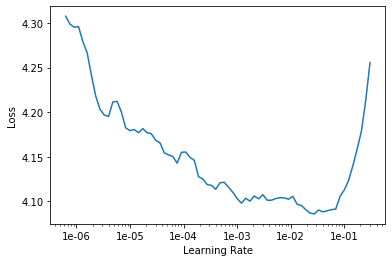

In [0]:
learn_lm.recorder.plot(skip_end=15)

I put down 7e-3 which was meh.

In [0]:
learn_lm.load('language-new-2')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (281462 items)
x: LMTextList
xxbos xxmaj yo bitch xxmaj ja xxmaj rule is more succesful then you 'll ever be what s up with you and hating you sad xxunk ... i should bitch slap ur xxunk white faces and get you to kiss my ass you guys sicken me . xxmaj ja rule is about pride in da music man . do nt diss that shit on him . and nothin is wrong bein like tupac he was a brother too ... fuckin white boys get things right next time . ,,xxbos = = xxmaj from rfc = = 
 
  xxmaj the title is fine as it is , xxup imo .,xxbos " 
 
  = = xxmaj sources = = 
 
  * xxmaj xxunk xxmaj ashton on xxmaj lapland — / ",xxbos : xxmaj if you have a look back at the source , the information i updated was the correct form . i can only guess the source had n't updated . i shall update the information once again but thank you for your message .,xxbos xxmaj thank you for understanding . i think very highly of you and would not revert without discussion .
y: LML

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


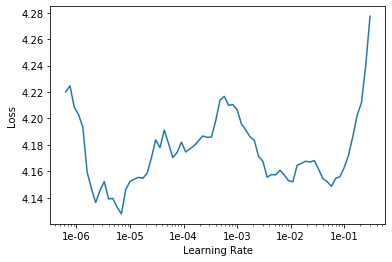

In [0]:
learn_lm.recorder.plot(skip_end=15)

I put 5e-3 here which was okay.

In [0]:
learn_lm.load('language-new-3')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (281462 items)
x: LMTextList
xxbos xxmaj yo bitch xxmaj ja xxmaj rule is more succesful then you 'll ever be what s up with you and hating you sad xxunk ... i should bitch slap ur xxunk white faces and get you to kiss my ass you guys sicken me . xxmaj ja rule is about pride in da music man . do nt diss that shit on him . and nothin is wrong bein like tupac he was a brother too ... fuckin white boys get things right next time . ,,xxbos = = xxmaj from rfc = = 
 
  xxmaj the title is fine as it is , xxup imo .,xxbos " 
 
  = = xxmaj sources = = 
 
  * xxmaj xxunk xxmaj ashton on xxmaj lapland — / ",xxbos : xxmaj if you have a look back at the source , the information i updated was the correct form . i can only guess the source had n't updated . i shall update the information once again but thank you for your message .,xxbos xxmaj thank you for understanding . i think very highly of you and would not revert without discussion .
y: LML

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


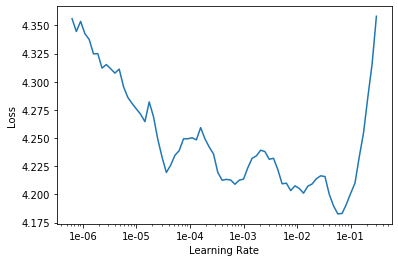

In [0]:
learn_lm.recorder.plot(skip_end=15)

I put 3e-3 here which also was okay.

In [0]:
learn_lm.load('language-new-4')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (281462 items)
x: LMTextList
xxbos xxmaj yo bitch xxmaj ja xxmaj rule is more succesful then you 'll ever be what s up with you and hating you sad xxunk ... i should bitch slap ur xxunk white faces and get you to kiss my ass you guys sicken me . xxmaj ja rule is about pride in da music man . do nt diss that shit on him . and nothin is wrong bein like tupac he was a brother too ... fuckin white boys get things right next time . ,,xxbos = = xxmaj from rfc = = 
 
  xxmaj the title is fine as it is , xxup imo .,xxbos " 
 
  = = xxmaj sources = = 
 
  * xxmaj xxunk xxmaj ashton on xxmaj lapland — / ",xxbos : xxmaj if you have a look back at the source , the information i updated was the correct form . i can only guess the source had n't updated . i shall update the information once again but thank you for your message .,xxbos xxmaj thank you for understanding . i think very highly of you and would not revert without discussion .
y: LML

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


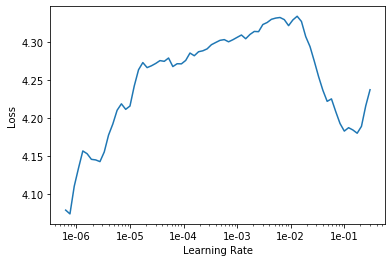

In [0]:
learn_lm.recorder.plot(skip_end=15)

put 1e-3 here, maybe i should have just do more cycles with bigger rate.

In [0]:
learn_lm.load('language-new-5')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (281462 items)
x: LMTextList
xxbos xxmaj yo bitch xxmaj ja xxmaj rule is more succesful then you 'll ever be what s up with you and hating you sad xxunk ... i should bitch slap ur xxunk white faces and get you to kiss my ass you guys sicken me . xxmaj ja rule is about pride in da music man . do nt diss that shit on him . and nothin is wrong bein like tupac he was a brother too ... fuckin white boys get things right next time . ,,xxbos = = xxmaj from rfc = = 
 
  xxmaj the title is fine as it is , xxup imo .,xxbos " 
 
  = = xxmaj sources = = 
 
  * xxmaj xxunk xxmaj ashton on xxmaj lapland — / ",xxbos : xxmaj if you have a look back at the source , the information i updated was the correct form . i can only guess the source had n't updated . i shall update the information once again but thank you for your message .,xxbos xxmaj thank you for understanding . i think very highly of you and would not revert without discussion .
y: LML

In [0]:
learn_lm.unfreeze()

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


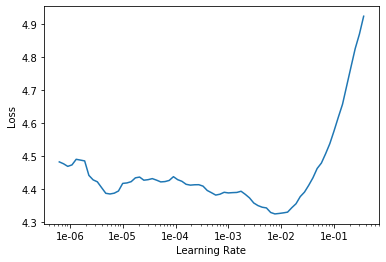

In [0]:
learn_lm.recorder.plot(skip_end=15)

First unfreeze run i put 5e-3 which was pretty good it seems.

In [0]:
learn_lm.load('language-new-7')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (281462 items)
x: LMTextList
xxbos xxmaj yo bitch xxmaj ja xxmaj rule is more succesful then you 'll ever be what s up with you and hating you sad xxunk ... i should bitch slap ur xxunk white faces and get you to kiss my ass you guys sicken me . xxmaj ja rule is about pride in da music man . do nt diss that shit on him . and nothin is wrong bein like tupac he was a brother too ... fuckin white boys get things right next time . ,,xxbos = = xxmaj from rfc = = 
 
  xxmaj the title is fine as it is , xxup imo .,xxbos " 
 
  = = xxmaj sources = = 
 
  * xxmaj xxunk xxmaj ashton on xxmaj lapland — / ",xxbos : xxmaj if you have a look back at the source , the information i updated was the correct form . i can only guess the source had n't updated . i shall update the information once again but thank you for your message .,xxbos xxmaj thank you for understanding . i think very highly of you and would not revert without discussion .
y: LML

In [0]:
learn_lm.unfreeze()

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


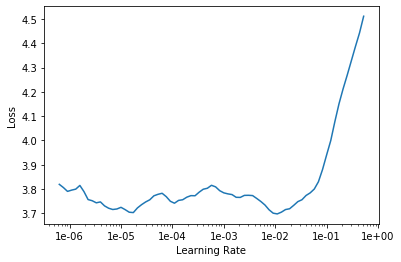

In [0]:
learn_lm.recorder.plot(skip_end=15)

Again 5e-3 which seems like a good choice.

In [0]:
learn_lm.load('language-new-8')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (281462 items)
x: LMTextList
xxbos xxmaj yo bitch xxmaj ja xxmaj rule is more succesful then you 'll ever be what s up with you and hating you sad xxunk ... i should bitch slap ur xxunk white faces and get you to kiss my ass you guys sicken me . xxmaj ja rule is about pride in da music man . do nt diss that shit on him . and nothin is wrong bein like tupac he was a brother too ... fuckin white boys get things right next time . ,,xxbos = = xxmaj from rfc = = 
 
  xxmaj the title is fine as it is , xxup imo .,xxbos " 
 
  = = xxmaj sources = = 
 
  * xxmaj xxunk xxmaj ashton on xxmaj lapland — / ",xxbos : xxmaj if you have a look back at the source , the information i updated was the correct form . i can only guess the source had n't updated . i shall update the information once again but thank you for your message .,xxbos xxmaj thank you for understanding . i think very highly of you and would not revert without discussion .
y: LML

In [0]:
learn_lm.unfreeze()

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


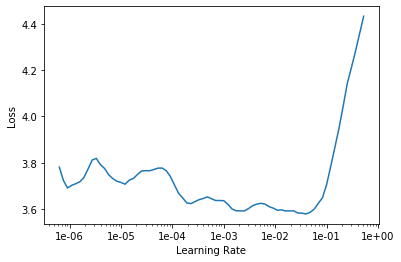

In [0]:
learn_lm.recorder.plot(skip_end=15)

Train some more
====

In [0]:
bs=16

In [0]:
data_lm = load_data('.','data_lm.pkl', bs=bs)

In [0]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn_lm.load('language-new-8')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (281462 items)
x: LMTextList
xxbos xxmaj yo bitch xxmaj ja xxmaj rule is more succesful then you 'll ever be what s up with you and hating you sad xxunk ... i should bitch slap ur xxunk white faces and get you to kiss my ass you guys sicken me . xxmaj ja rule is about pride in da music man . do nt diss that shit on him . and nothin is wrong bein like tupac he was a brother too ... fuckin white boys get things right next time . ,,xxbos = = xxmaj from rfc = = 
 
  xxmaj the title is fine as it is , xxup imo .,xxbos " 
 
  = = xxmaj sources = = 
 
  * xxmaj xxunk xxmaj ashton on xxmaj lapland — / ",xxbos : xxmaj if you have a look back at the source , the information i updated was the correct form . i can only guess the source had n't updated . i shall update the information once again but thank you for your message .,xxbos xxmaj thank you for understanding . i think very highly of you and would not revert without discussion .
y: LML

In [0]:
learn_lm.unfreeze()

In [0]:
learn_lm.fit_one_cycle(1, 2e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.885095,3.661357,0.375494,1:44:07


In [0]:
learn_lm.save('language-new-9')

In [0]:
learn_lm.unfreeze()

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


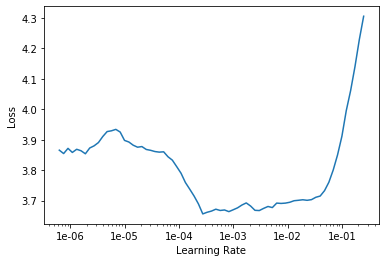

In [0]:
learn_lm.recorder.plot(skip_end=15)

In [0]:
learn_lm.fit_one_cycle(1, slice(3e-4,3e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.673548,3.639181,0.378124,1:36:52


In [0]:
learn_lm.save('language-new-10')

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


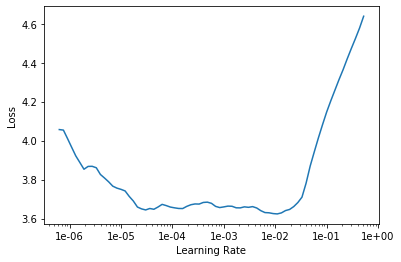

In [0]:
learn_lm.recorder.plot(skip_end=15)

In [0]:
learn_lm.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.704124,3.621324,0.380460,1:55:50


In [0]:
learn_lm.save('language-new-11')

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


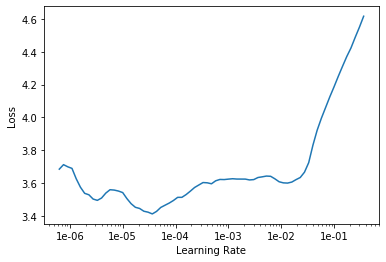

In [0]:
learn_lm.recorder.plot(skip_end=15)

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


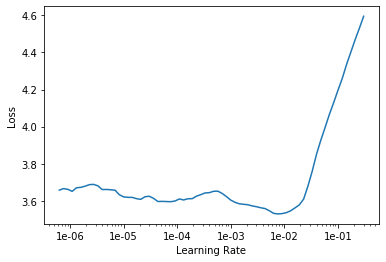

In [0]:
learn_lm.recorder.plot(skip_end=15)

In [0]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


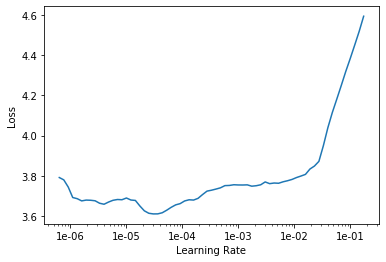

In [0]:
learn_lm.recorder.plot(skip_end=15)

In [0]:
learn_lm.fit_one_cycle(1, slice(1e-4,1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.717778,3.618662,0.381533,1:50:19


In [0]:
learn_lm.save('language-new-12')

In [0]:
learn_lm.save_encoder(path/'fine_tuned_enc')

Multi-label prediction
===

In [0]:
bs=16

In [0]:
data_lm = load_data('.','data_lm.pkl', bs=bs)

In [0]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [0]:
learn_lm.load('language-new-12')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (281462 items)
x: LMTextList
xxbos xxmaj yo bitch xxmaj ja xxmaj rule is more succesful then you 'll ever be what s up with you and hating you sad xxunk ... i should bitch slap ur xxunk white faces and get you to kiss my ass you guys sicken me . xxmaj ja rule is about pride in da music man . do nt diss that shit on him . and nothin is wrong bein like tupac he was a brother too ... fuckin white boys get things right next time . ,,xxbos = = xxmaj from rfc = = 
 
  xxmaj the title is fine as it is , xxup imo .,xxbos " 
 
  = = xxmaj sources = = 
 
  * xxmaj xxunk xxmaj ashton on xxmaj lapland — / ",xxbos : xxmaj if you have a look back at the source , the information i updated was the correct form . i can only guess the source had n't updated . i shall update the information once again but thank you for your message .,xxbos xxmaj thank you for understanding . i think very highly of you and would not revert without discussion .
y: LML

Split training data so we can test our classifier once before predicting.

In [0]:
path = Config.data_path()/'toxic'

In [0]:
data_multi = (TextList.from_csv(path,'train.csv',cols='comment_text', vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_rand_pct(0.1)
              #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_df(cols=['toxic','severe_toxic','obscene','threat','insult','identity_hate'])
             #label them all with their folders
             .databunch(bs=bs))

In [0]:
data_multi.save(path/'data_multi.pkl')

In [0]:
data_multi = load_data(path,'data_multi.pkl')

In [0]:
data_multi.show_batch()

text,target
xxbos xxmaj take that ! \n \n xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in xxup the xxup ass xxup in,toxic;severe_toxic;obscene
"xxbos these two users are correct . chliorine is a good element . it is nice . lol it is the best element it is the best element of the pierodic chair . lol chllorine is so nice it is good , but the artlice says it is bad but it is not chlorine is xxunk . it is nice . lol it is the best element it is the",
"xxbos "" \n \n { { xxunk is absolutely false . i absolutely did not "" "" make a personal attack "" "" on you . xxmaj dishonestly claiming a false pretext to block me is a reprehensible abuse of your authority . xxmaj since the stated reason for this one - week block is wholly spurious , absolutely false , i demand to be unblocked immediately . \n",
"xxbos "" \n \n xxmaj okay , thanks , that 's clear , i will action that when i get time . xxmaj it is not really that i am attacking anybody , but that i am defending myself again the attacks of xxmaj user : xxmaj bobrayner against articles that i spent a lot of time on ( without pay ) to inform readers . xxmaj the main",
"xxbos "" \n \n xxmaj america 's xxmaj failed xxmaj federal xxmaj criminal xxmaj justice xxmaj system . \n \n xxmaj dateline : \n 21 xxmaj july 2005 \n xxunk \n xxmaj washington , xxup dc \n xxup usa \n \n xxmaj america 's xxmaj failed xxmaj federal xxmaj criminal xxmaj justice xxmaj system . \n \n xxmaj by : xxmaj mark",


In [0]:
classifier = text_classifier_learner(data_multi, AWD_LSTM, drop_mult=0.5)

In [0]:
classifier.load_encoder(path/'fine_tuned_enc')

In [0]:
classifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


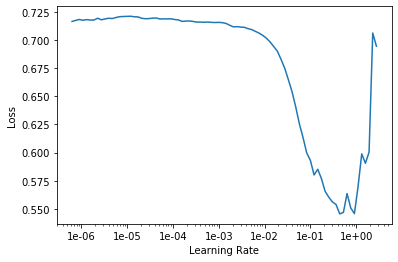

In [0]:
classifier.recorder.plot()

In [0]:
classifier.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.083376,0.118029,20:52


In [0]:
classifier.save(path/'class-1')

In [0]:
classifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


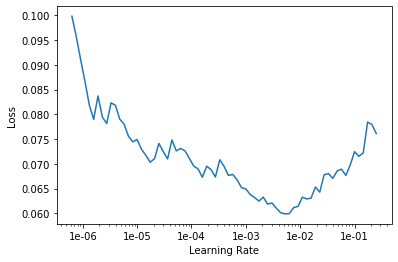

In [0]:
classifier.recorder.plot()

In [0]:
classifier.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.093234,0.109228,24:20


In [0]:
classifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


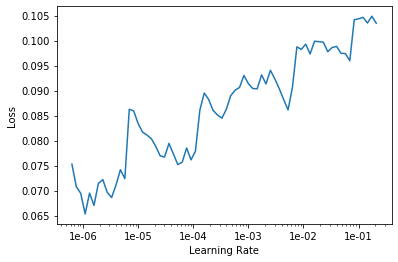

In [0]:
classifier.recorder.plot()

In [0]:
classifier.save(path/'class-2')

In [0]:
classifier.freeze_to(-2)

In [0]:
classifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


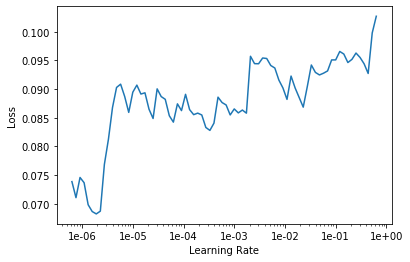

In [0]:
classifier.recorder.plot()

In [0]:
classifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


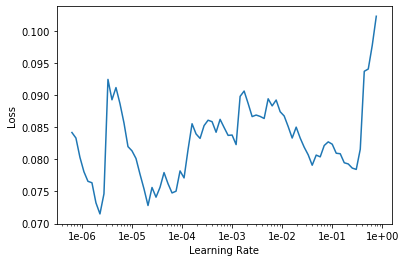

In [0]:
classifier.recorder.plot()

In [0]:
2.6**4

45.69760000000001

In [0]:
classifier.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,time
0,0.059724,0.593460,38:01


In [0]:
classifier.save(path/'class-3')

Metric
===

Forgot to add the metric the data is evaluated on. Doesnt make a difference for training really. But score is nice to know, if we should keep training.

In [0]:
bs=4

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [0]:
path = Config.data_path()/'toxic'

In [0]:
from sklearn.metrics import roc_auc_score

In [0]:
def roc_auc(preds, y):                                                                                                                                                                                         
  return metrics.roc_auc_score(y.data.cpu().numpy(), preds.cpu().numpy(),average='macro') 

In [0]:
data_multi = load_data(path,'data_multi.pkl',bs=bs)

In [0]:
classifier = text_classifier_learner(data_multi, AWD_LSTM, drop_mult=0.5,metrics=roc_auc)

In [0]:
classifier.load_encoder(path/'fine_tuned_enc')

In [0]:
classifier.load(path/'class-3')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (143614 items)
x: TextList
xxbos xxmaj explanation 
  xxmaj why the edits made under my username xxmaj hardcore xxmaj metallica xxmaj fan were reverted ? xxmaj they were n't vandalisms , just closure on some gas after i voted at xxmaj new xxmaj york xxmaj dolls xxup fac . xxmaj and please do n't remove the template from the talk page since i 'm retired xxunk,xxbos xxmaj xxunk ! xxmaj he matches this background colour i 'm seemingly stuck with . xxmaj thanks . ( talk ) 21:51 , xxmaj january 11 , 2016 ( xxup utc ),xxbos " 
  xxmaj more 
  i ca n't make any real suggestions on improvement - i wondered if the section statistics should be later on , or a subsection of " " types of accidents " " xxup -i think the references may need tidying so that they are all in the exact same format ie date format etc . i can do that later on , if no - one else does first - if you have any preferences for formatting style on references or want to do it 

In [0]:
classifier.export(path/'NLP-classifier')

In [0]:
classifier.freeze_to(-3)

In [0]:
classifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


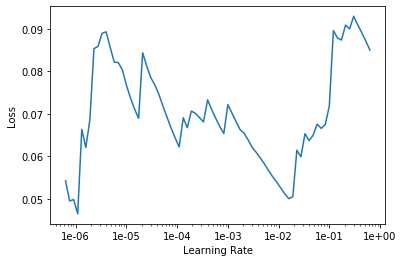

In [0]:
classifier.recorder.plot()

In [0]:
classifier.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,roc_auc,time


In [0]:
classifier.save(path/'class-4')

In [0]:
classifier.lr_find()

In [0]:
classifier.recorder.plot()

Predict
===

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai.text import *

In [6]:
path = Config.data_path()/'toxic'

In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
def roc_auc(preds, y):                                                                                                                                                                                         
  return metrics.roc_auc_score(y.data.cpu().numpy(), preds.cpu().numpy(),average='macro') 

In [18]:
data_test = (TextList.from_csv(path,'test.csv',cols='comment_text'))

In [19]:
data_test.show_xys()

TypeError: show_xys() missing 2 required positional arguments: 'xs' and 'ys'

In [21]:
df_test = pd.read_csv(path/'test.csv')
len(df_test)

153164

In [21]:
classifier = load_learner(path,'NLP-classifier',test=data_test)

These next few lines i did on google colab since it crashed on my pc, i also had to rerun it because i forgot to put ordered=True, which is important for the TextClassifier because it sorts by text length. We however need the initial ordering.

In [0]:
arg_1,arg_2 = classifier.get_preds(ds_type=DatasetType.Test, ordered=True)

In [17]:
df = pd.DataFrame(data = arg_1, columns = ['toxic','severe_toxic','obscene','threat','insult','identity_hate'])

In [18]:
df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.02538,0.004693,0.016934,0.000058,0.012835,0.001107


In [19]:
idx = 0
df.insert(loc=idx, column='id', value=df_test['id'])

In [20]:
df.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.02538,0.004693,0.016934,0.000058,0.012835,0.001107


In [0]:
df.to_csv('submission.csv',index=False)


In [42]:
df_test.iloc(0)[0]['comment_text']

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

In [43]:
classifier.predict(df_test.iloc(0)[0]['comment_text'])

D:\Software\Miniconda\envs\python37\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


(MultiCategory toxic;severe_toxic;obscene;threat;insult,
 tensor([1., 1., 1., 1., 1., 0.]),
 tensor([0.9856, 0.6513, 0.9744, 0.5761, 0.8726, 0.4293]))

In [ ]:
!kaggle competitions submit jigsaw-toxic-comment-classification-challenge -f {path/'submission.csv'} -m "Initial submission"

Gets a score of 90.7% at kaggle which is comparetively low, but we're also doing a lot of things right. I should have switched sooner to google colab to train the LM and classifier.